Mean First Passage Time
=====

Compute the mean time required for the solution of a stochastic differential equation to leave a prescribed interval $x_0 < x < x_1$. We define the SDE in the form

$$ dX_t = a \, dt + b\, dW_t $$

The equation governing the mean time $T$ is (Gardiner, 1985, pg.138)

$$ -1 = a \frac{\partial T}{\partial x} + \frac{b^2}{2} \frac{\partial^2 T}{\partial x^2} $$

which is subject to boundary conditions $T(x_0) = T(x_1) = 0 $. We compute solutions for $T$ numerically using finite differences.

Discrete governing equation can be written as 

$$ \frac{b^2}{2\Delta x^2} ( T_{i+1} - 2 T_i + T_{i-1}) + \frac{a}{2\Delta x} (T_{i+1}-T_{i-1}) = -1 $$

using central differences. Rearranging for $T_i$

$$ T_i =  \frac{\Delta x^2}{b^2} + \left[ \frac{1}{2} + \frac{a\Delta x}{2b^2}\right] T_{i+1} + \left[\frac{1}{2} - \frac{a\Delta x}{2b^2}\right] T_{i-1}$$

Find solutions for $T_i$ using the Jacobi iterative method.

In [1]:
using Plots
using Distributions
using Statistics
using SpecialFunctions

Define the grid and limits ($x_0$, $x_1$)

In [2]:
x0 = 0;
x1 = 20;
ngrid = 201;
dx = (x1-x0)/(ngrid-1);
dx2 = dx * dx;

x = (x0 : dx : x1)
Tin = zeros(ngrid);
Tout = zeros(ngrid);

Define parameters of stochastic model (from Morzfeld & Buffett, 2019)

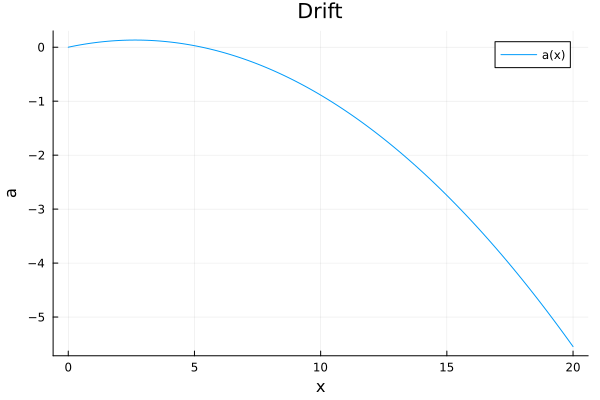

In [3]:
γ = 0.1
D2 = 0.34
xbar = 5.3;

a = -γ * (x/xbar).* (abs.(x) .- xbar);
b = sqrt(2 * D2) * ones(ngrid);

plot(x,a,label="a(x)",xlabel="x",ylabel = "a",title="Drift")

Iterative solution using Jacobi method

In [4]:
for iteration = 1 : ngrid^2
    for j = 2 : ngrid-1
        c = a[j] * dx  / b[j]^2;
        Tout[j] =  dx2 / b[j]^2 + 0.5*(1.0 + c)*Tin[j+1] + 0.5*(1.0 - c)*Tin[j-1];
    end
    Tout[ngrid] = Tout[ngrid-1];   # reflecting boundary condition
    copy!(Tin,Tout)
end

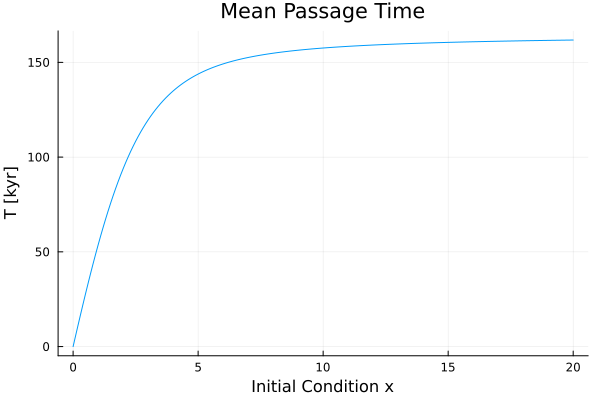

In [5]:
plot(x,Tout,
    label=nothing,
    xlabel="Initial Condition x",
    ylabel="T [kyr]",
    title="Mean Passage Time")

Retrieve time $T$ for $x = \langle x \rangle$

In [6]:
println("Time = ",Tout[54]," kyr for x = ",x[54])

Time = 145.72627711120322 kyr for x = 5.3


Solution by Kramers formula

In [7]:
r = 0.5*(γ/pi) * exp(-γ * xbar^2/ (6 * D2))
    
println("Reversal rate = ",r*1000," 1/Myr")
println("Mean Passage Time = ",1/r," kyr")

Reversal rate = 4.016184550988671 1/Myr
Mean Passage Time = 248.99254187754605 kyr
